In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from result_saver import SaverProvider
provider = SaverProvider()
backend = provider.get_backend('ibmq_mumbai')

In [20]:
job = provider.retrieve_job("cmyhbrqrmwhg008bs4h0")
memory = job.result().get_memory()

print(memory.shape)

(1000, 9)


In [21]:
from soft_info import get_counts

counts_default = get_counts(memory)
print(counts_default)

13:46:05 Warning: Missing layout or synd_rounds, estimating outcomes without KDEs.. IN FILE: /Users/mha/My Drive/Desktop/Studium/Physik/Master/Semester 3/IBM/IBM GIT/Soft-Info/src/soft_info/UnionFind/probabilities.py, LINE: 65
13:46:05 Warning: Not enough kernels or no scaler provided. Using the magnitude of the real part for estimation... IN FILE: /Users/mha/My Drive/Desktop/Studium/Physik/Master/Semester 3/IBM/IBM GIT/Soft-Info/src/soft_info/UnionFind/probabilities.py, LINE: 28
{'000000000': 622, '000100000': 95, '000000010': 65, '000001000': 61, '000101000': 20, '000101010': 15, '000100010': 12, '000001010': 9, '001000000': 9, '000010101': 7, '010000000': 6, '010110011': 5, '100101000': 5, '100100010': 5, '000010000': 5, '000000100': 5, '100001000': 5, '001000100': 4, '001010001': 3, '001010000': 3, '100100000': 3, '010100100': 2, '000110101': 2, '000000110': 2, '100101010': 2, '100000000': 2, '100001010': 2, '001011000': 2, '000011000': 2, '000010100': 2, '010110010': 1, '010011011

In [22]:
from soft_info import get_KDEs

layout = [25, 19, 26, 22, 16] # To implement: into scratch job_data
kde_dict, scaler_dict = get_KDEs(provider, 'ibmq_mumbai', layout, bandwidths=0.2, plot=False)

counts_kde = get_counts(memory, kde_dict, scaler_dict, layout, 3, verbose=True) # hardcoded num of rounds can be retrieved from metadata
print(counts_kde)

Processing 1000 shots: 100%|██████████| 1000/1000 [00:53<00:00, 18.78it/s]

{'000 00 00 00': 870, '000 01 00 00': 14, '000 10 10 10': 11, '000 01 01 01': 10, '000 00 01 00': 9, '100 00 10 00': 8, '100 10 00 10': 7, '000 10 00 00': 7, '000 10 10 00': 6, '010 11 00 11': 5, '001 00 00 00': 5, '001 01 00 01': 4, '001 01 00 00': 4, '001 00 01 00': 4, '100 10 00 00': 4, '100 00 00 00': 3, '000 00 10 00': 3, '000 10 00 10': 2, '000 00 10 10': 2, '000 01 01 00': 2, '010 11 01 00': 1, '010 00 00 00': 1, '010 11 00 00': 1, '010 01 00 11': 1, '001 01 01 01': 1, '010 01 10 01': 1, '010 10 01 00': 1, '001 10 10 00': 1, '000 00 00 01': 1, '010 00 11 00': 1, '000 10 11 10': 1, '000 11 01 01': 1, '100 00 10 10': 1, '001 01 10 00': 1, '001 01 01 00': 1, '000 00 00 10': 1, '000 01 00 01': 1, '010 10 00 00': 1, '001 11 10 10': 1, '100 10 10 00': 1}


# Generate rep code data

from qiskit_qec.analysis._c_analysis import _CErrorPropagator             failed, raising No module named 'qiskit_qec.analysis._c_analysis'
Traceback (most recent call last):
  File "/Users/mha/My Drive/Desktop/Studium/Physik/Master/Semester 3/IBM/IBM GIT/Soft-Info/libs/qiskit-qec/src/qiskit_qec/analysis/extensions.py", line 21, in <module>
    from qiskit_qec.analysis._c_analysis import _CErrorPropagator  # pylint: disable=unused-import
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'qiskit_qec.analysis._c_analysis'
from qiskit_qec.analysis._c_analysis import _CFaultEnumerator             failed, raising No module named 'qiskit_qec.analysis._c_analysis'
Traceback (most recent call last):
  File "/Users/mha/My Drive/Desktop/Studium/Physik/Master/Semester 3/IBM/IBM GIT/Soft-Info/libs/qiskit-qec/src/qiskit_qec/analysis/extensions.py", line 32, in <module>
    from qiskit_qec.analysis._c_analysis import _CFaultEnumerator  # pylint: d

18:04:08 Warning: Not a valid heavy hex map, found 6 cornernodes instead of 2. Looking for longest path starting with the last corner node.. IN FILE: /Users/mha/My Drive/Desktop/Studium/Physik/Master/Semester 3/IBM/IBM GIT/Soft-Info/src/soft_info/Hardware/coupling_map.py, LINE: 118


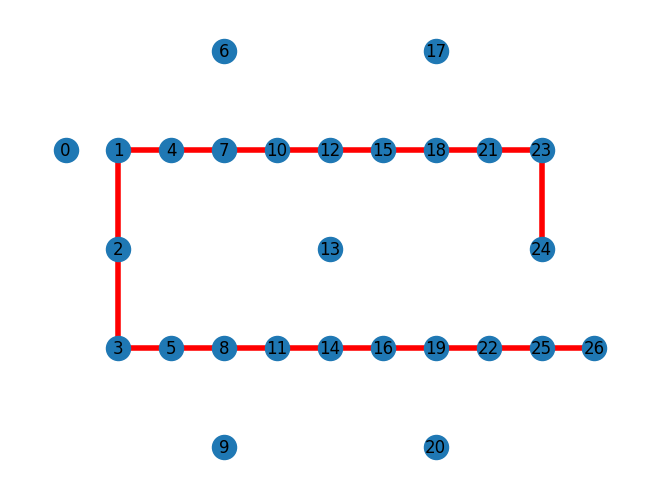

18:04:09 Warning: divide by zero encountered in det. IN FILE: /Users/mha/.local/share/virtualenvs/Soft-Info-kp2AnOc1/lib/python3.11/site-packages/numpy/linalg/linalg.py, LINE: 2180
18:04:09 Warning: invalid value encountered in det. IN FILE: /Users/mha/.local/share/virtualenvs/Soft-Info-kp2AnOc1/lib/python3.11/site-packages/numpy/linalg/linalg.py, LINE: 2180


In [12]:
from qiskit_qec.circuits import RepetitionCodeCircuit
from qiskit import transpile
from soft_info import get_repcode_layout

# Code Params
distance = 3
rounds = 3
logical = '0'

code = RepetitionCodeCircuit(distance, rounds)
qc = code.circuit[logical]

layout = get_repcode_layout(distance, backend, _is_hex=True, plot=True)

transpiled_qc = transpile(qc, backend, initial_layout=layout, optimization_level=3)

In [14]:
from Scratch import metadata_helper

metadata = metadata_helper(descr="Testing the shots to compare IQ" ,code="RepetitionCodeCircuit", distance=distance, rounds=rounds, logical=logical, layout='_is_hex=True')

backend.run(metadata, transpiled_qc, shots=1000, meas_level=0, meas_return='single') # meas_level=1 for IQ

<IBMCircuitJob('cmyk2vbrmwhg008bs57g')>

# Comparing with counts job

In [17]:
job = provider.retrieve_job("cmyk2vbrmwhg008bs57g")
counts = job.result().get_counts()

counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))
print(counts)

{'000 00 00 00': 602, '000 10 00 00': 93, '000 00 10 00': 62, '000 00 00 10': 48, '000 10 10 10': 34, '000 10 10 00': 22, '000 10 00 10': 14, '100 10 00 00': 10, '100 00 00 00': 9, '100 10 00 10': 8, '000 00 01 00': 8, '000 01 00 00': 6, '100 10 10 00': 6, '000 00 00 01': 5, '100 00 10 00': 5, '001 00 00 00': 5, '001 00 01 00': 5, '001 01 00 01': 5, '100 00 00 10': 4, '100 00 10 10': 2, '000 01 01 01': 2, '000 10 00 01': 2, '001 00 01 10': 2, '001 01 00 00': 2, '010 00 00 00': 2, '010 01 00 00': 2, '010 01 10 01': 2, '000 00 10 10': 2, '010 11 00 00': 2, '100 10 10 10': 1, '100 11 00 00': 1, '000 01 01 00': 1, '101 10 00 00': 1, '000 01 01 11': 1, '110 11 00 00': 1, '000 01 11 00': 1, '000 10 01 10': 1, '000 11 00 00': 1, '000 11 11 10': 1, '000 11 11 11': 1, '001 00 00 10': 1, '001 00 10 00': 1, '001 10 10 10': 1, '001 10 11 10': 1, '001 11 00 00': 1, '001 11 01 11': 1, '010 00 10 00': 1, '010 00 11 00': 1, '000 00 10 01': 1, '010 01 10 00': 1, '010 10 00 11': 1, '010 10 01 00': 1, '0